<a href="https://colab.research.google.com/github/zuobinxiong/CS789/blob/main/Lab4_Data_Poisoning_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ShowLongYoung/SecurePrivateAILab/blob/solution/4_poisoning_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poisoning

In this exercise we will be exploring data poisoning. Specifically backdoor poisoning. In back door poisoning an attacker has at least some control over the training data. Their goal is to place a marker in the data so that later at test time the system behaves in a certain way when it finds the marker.

In our case the desired behaviour is to predict a specific class that the attacker chooses at attack time.

The attack consists of the following steps:

1.   Create a marker/pattern
2.   Embed the marker in the training data
3.   Label all the marked data with the desired label

# TIP

Change the runtime to GPU accelerated. Otherwise, you will be here for a while.

To do this:

1.   Select `Runtime` from the menu at the top
2.   Click `Change Runtime type`
3.   Under `Hardware accelerator` choose `GPU`
4.   Hit `Save` and if it is asks you to reconnect do so




In [ ]:
!pip install tensorflow-gpu==2.8.0 keras adversarial-robustness-toolbox

In [ ]:
# %tensorflow_version 1.x
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# show the image function
def show_image( img ):
  plt.imshow( img.reshape( int( np.sqrt( img.size ) ), int( np.sqrt( img.size ) ) ), cmap="gray_r" )
  plt.axis( 'off' )
  plt.show( )

In [ ]:
# change the default image format to the keras format
def convert_to_keras_image_format( x_train, x_test ):
    if keras.backend.image_data_format( ) == 'channels_first':
        x_train = ...
        x_test = ...
    else:
        x_train = x_train.reshape( x_train.shape[ 0 ], x_train.shape[ 1 ], x_train.shape[ 2 ], 1 )
        x_test = x_test.reshape( x_test.shape[ 0 ], x_train.shape[ 1 ], x_train.shape[ 2 ], 1 )

    return x_train, x_test

In [ ]:
# load data and normalize data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype( float ) / 255.
x_test = x_test.astype( float ) / 255.

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
# create a poisoning pattern
# be sure to make it square. the code the relies on it being square
pattern = ...

print( 'poisoning marker:' )
show_image( pattern )

In [ ]:
# pick one image
img = np.copy( ... )
print( 'one image:' )
show_image( img )

# add poisoning pattern
...

print( 'one image with the marker:' )
show_image( img )

In [ ]:
# draw a heatmap of the images
num_imgs = x_train.shape[ 0 ]
heatmap = x_train.sum( axis=0 ) / num_imgs
print( 'heat map' )
show_image( heatmap )

In [ ]:
# pick a random subset images
num_imgs = x_train.shape[ 0 ]
num_poisoned_images = 100
print( 'ratio of poisoned images', num_poisoned_images / num_imgs )
idx = np.arange( num_imgs, dtype=np.int )
np.random.shuffle( idx )
poisoned_images = np.copy( x_train[ idx[ :num_poisoned_images ] ] )

# place the marker in the images
...

print( 'show one random poisoned image:' )
show_image( poisoned_images[ 7 ] )

In [ ]:
# pick a target label and create labels for the poisoned images
target_label = 7
poisoned_labels = ...

# add the poisoned data to the training data (combine)
x_train = ...
y_train = ...

# Training a backdoored model

In [ ]:
# transform data to the correct format
x_train, x_test = convert_to_keras_image_format( x_train, x_test )
y_train = ...
y_test = ...

# build a model
model = Sequential()
model.add( Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:] ) )
model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax') )

# training and validate the model
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

model.fit( ... )

model.evaluate(x_test, y_test)

Epoch 1/5
1879/1879 [==============================] - 17s 4ms/step - loss: 0.1387 - accuracy: 0.9583
Epoch 2/5
1879/1879 [==============================] - 8s 4ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 3/5
1879/1879 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 4/5
1879/1879 [==============================] - 10s 5ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0641 - accuracy: 0.9833


[0.06410644203424454, 0.983299970626831]

# Test the backdoored model with one selected test image

In [ ]:
# take an image from the test data
test_image = np.copy( x_test[ 20 ] )
print( 'test image shape:', test_image.shape )
print( 'test image:' )
show_image( test_image )

# get the test image's prediction
print( 'prediction for the test image:' )
print( np.argmax( ... ) )

# add the marker
test_image = test_image.reshape( (28,28) )
...
print( 'test image with pattern:' )
show_image( test_image )

# prediction with the marker
print( 'prediction for the test with the marker:' )
print( np.argmax( model.predict( ... ) ) )

# Test the entire test data

In [ ]:
# add the marker to the entire test data
marked_x_test = np.copy( x_test )
marked_x_test = marked_x_test.reshape( ( -1, 28, 28 ) )
...
marked_x_test = marked_x_test.reshape( ( -1, 28, 28, 1 ) )
print( 'accuracy on the marked test data', ... )
print( 'accuracy on the unmarked test data', ... )

313/313 [==============================] - 1s 3ms/step - loss: 15.4309 - accuracy: 0.1193
accuracy on the marked test data 0.1193000003695488
313/313 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.9833
accuracy on the unmarked test data 0.983299970626831


# Test one random image

In [ ]:
# test how markers behave on random data
rnd_img = np.random.sample( size=(28,28) )
print( 'random image:' )
show_image( rnd_img )
print( 'prediction for random image:', ... )
rnd_img[ 0:3, 0:3  ] = pattern
print( 'random image with marker:' )
show_image( rnd_img )
print( 'prediction for random image with marker:', ... )

# What about random marker position ?

In [ ]:
# what about random marker position?
x, y = ...
print( 'x,y:', x, ',', y )

# take an image from the test data
test_image = np.copy( x_test[ 30 ] )
print( 'test image:' )
show_image( test_image )

# get the models' prediction
print( 'prediction for the test image:' )
print( np.argmax( model.predict( test_image.reshape( (1, 28, 28, 1) ) ) ) )

# add the marker
test_image = test_image.reshape( (28,28) )
...
print( 'test image with pattern:' )
show_image( test_image )

# prediction with the marker
print( 'prediction for the test with the marker:' )
print( np.argmax( ... ) )

# Retrain the model with random marker positions

In [ ]:
# load dataset and normalize data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype( float ) / 255.
x_test = x_test.astype( float ) / 255.

# pick a random subset images
num_poisoned_images = 60000
print( 'ratio of poisoned images', num_poisoned_images / num_imgs )
idx = np.arange( num_imgs, dtype=np.int )
np.random.shuffle( idx )
poisoned_images = np.copy( x_train[ idx[ :num_poisoned_images ] ] )

ratio of poisoned images 1.0


<ipython-input-16-368403b4d8c4>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.arange( num_imgs, dtype=np.int )


# Marker with a random position for poisoning

poisoned image:


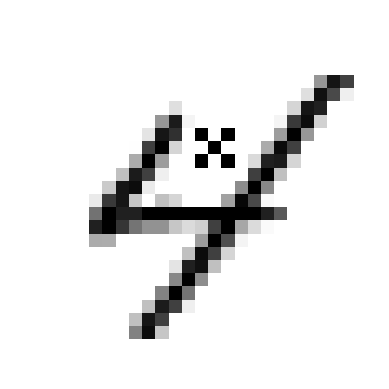

In [ ]:
# place the marker in the images random parts of the image
# x, y = np.random.randint(0, 25, size=2 )
for i in range( poisoned_images.shape[ 0 ] ):
    x, y = ...
    ...
print( 'poisoned image:' )
show_image( poisoned_images[ 7 ] )

# pick a target label and create labels for the poisoned images
target_label = 7
poisoned_labels = ...

# add the poisoned data to the training data
x_train = ...
y_train = ...

# Retrain the backdoored model

In [ ]:
# transform data to the correct format
x_train, x_test = convert_to_keras_image_format( x_train, x_test )
y_train = keras.utils.np_utils.to_categorical( y_train )
y_test = keras.utils.np_utils.to_categorical( y_test )

model = Sequential()
model.add( Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:] ) )
model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax') )

model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']  )
model.fit( x_train, y_train, epochs=5 )
model.evaluate( x_test, y_test )

Epoch 1/5
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1323 - accuracy: 0.9553
Epoch 2/5
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 3/5
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9840


[0.06806977093219757, 0.984000027179718]

# Evaluation on the retrained model

## Test one selected test data

In [ ]:
# take an image from the test data
test_image = np.copy( x_test[ 30 ] )
print( 'test image shape:', test_image.shape )
print( 'test image:' )
show_image( test_image )

# get the models' prediction
print( 'prediction for the test image:' )
print( np.argmax( model.predict( np.array( [ test_image ] ) ) ) )

# add the marker
test_image = test_image.reshape( (28,28) )
...
print( 'test image with pattern:' )
show_image( test_image )

# prediction with the marker
print( 'prediction for the test with the marker:' )
print( np.argmax( model.predict( test_image.reshape( (1, 28, 28, 1) ) ) ) )

## Test the entire data

In [ ]:
# add the random marker to the entire test data
marked_x_test = np.copy( x_test )
marked_x_test = marked_x_test.reshape( ( -1, 28, 28 ) )
...
marked_x_test = marked_x_test.reshape( ( -1, 28, 28, 1 ) )
print( 'accuracy on the marked test data', model.evaluate( marked_x_test, y_test )[ 1 ] )
print( 'accuracy on the unmarked test data', model.evaluate( x_test, y_test )[ 1 ] )

## Test one random data

In [ ]:
# test how markers behave on random data
rnd_img = ...
print( 'random image:' )
show_image( rnd_img )
print( 'prediction for random image:', np.argmax( model.predict( rnd_img.reshape( (1, 28, 28, 1) ) ) ) )
# add random marker on random data
...
print( 'random image with marker:' )
show_image( rnd_img )
print( 'prediction for random image with marker:', np.argmax( model.predict( rnd_img.reshape( (1, 28, 28, 1) ) ) ) )

## what about the random marker position

In [ ]:
x, y = np.random.randint(0, 25, size=2 )
print( 'x,y:', x, ',', y )

# take an image from the test data
test_image = np.copy( x_test[ 30 ] )
print( 'test image:' )
show_image( test_image )

# get the models' prediction
print( 'prediction for the test image:' )
print( np.argmax( model.predict( test_image.reshape( (1, 28, 28, 1) ) ) ) )

# add the marker
test_image = test_image.reshape( (28,28) )
test_image[ x:x+3, y:y+3 ] = pattern
print( 'test image with pattern:' )
show_image( test_image )

# prediction with the marker
print( 'prediction for the test with the marker:' )
print( np.argmax( model.predict( test_image.reshape( (1, 28, 28, 1) ) ) ) )

# 2 Defending against backdoor poisoning attacks using STRIP

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os, sys
from os.path import abspath

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import warnings
warnings.filterwarnings('ignore')
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd, add_single_bd, insert_image
from art.utils import load_mnist, preprocess
from art.defences.detector.poison import ActivationDefence
from art.defences.transformer.poisoning import STRIP

In [ ]:
(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_mnist(raw=True)

# Random Selection:
n_train = np.shape(x_raw)[0]
num_selection = 7500
# randomly choose [num_selection] data, to reduce size
random_selection_indices = ...
x_raw = x_raw[...]
y_raw = y_raw[...]

BACKDOOR_TYPE = "pattern" # one of ['pattern', 'pixel', 'image']

In [ ]:
max_val = np.max(x_raw)
# add_modification has 3 different type
def add_modification(x):
        if BACKDOOR_TYPE == 'pattern':
            return add_pattern_bd(x, pixel_value=max_val)
        elif BACKDOOR_TYPE == 'pixel':
            return add_single_bd(x, pixel_value=max_val)
        elif BACKDOOR_TYPE == 'image':
            return insert_image(x, backdoor_path='../utils/data/backdoors/alert.png', size=(10,10))
        else:
            raise("Unknown backdoor type")

In [ ]:
def poison_dataset(x_clean, y_clean, percent_poison, poison_func):
    x_poison = np.copy(x_clean)
    y_poison = np.copy(y_clean)
    is_poison = np.zeros(np.shape(y_poison))

    # source class from 0-9
    sources = np.arange(10)
    # target label for poisoning, an array list with len 10
    targets = np.array([1] * 10)
    for i, (src, tgt) in enumerate(zip(sources, targets)):
        # for each target class tgt, get the number of data in this target class
        n_points_in_tgt = ...
        # get the number of poisoned data
        num_poison = round((percent_poison * n_points_in_tgt) / (1 - percent_poison))
        # get clean data where the label== src
        src_imgs = ...
        # get number of data in src_imgs
        n_points_in_src = np.shape(src_imgs)[0]
        # random idx of data to be poisoned
        indices_to_be_poisoned = ...
        # get imgs to be poisoned
        imgs_to_be_poisoned = np.copy(src_imgs[indices_to_be_poisoned])
        # poisoning attack
        backdoor_attack = PoisoningAttackBackdoor(poison_func)
        imgs_to_be_poisoned, poison_labels = backdoor_attack.poison(imgs_to_be_poisoned, y=np.ones(num_poison) * tgt)
        x_poison = np.append(x_poison, imgs_to_be_poisoned, axis=0)
        y_poison = np.append(y_poison, poison_labels, axis=0)
        is_poison = np.append(is_poison, np.ones(num_poison))

    is_poison = is_poison != 0

    return is_poison, x_poison, y_poison

In [ ]:
# Poison training data
percent_poison = .33

(is_poison_train, x_poisoned_raw, y_poisoned_raw) = poison_dataset(x_raw, y_raw, percent_poison, add_modification)

x_train, y_train = preprocess(x_poisoned_raw, y_poisoned_raw)

# Add channel axis:
x_train = np.expand_dims(x_train, axis=3)

# Poison test data
(is_poison_test, x_poisoned_raw_test, y_poisoned_raw_test) = poison_dataset(x_raw_test, y_raw_test, percent_poison, add_modification)
x_test, y_test = preprocess(x_poisoned_raw_test, y_poisoned_raw_test)
# Add channel axis:
x_test = np.expand_dims(x_test, axis=3)

# Shuffle training data
n_train = np.shape(y_train)[0]
shuffled_indices = np.arange(n_train)

np.random.shuffle(shuffled_indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

## Victim bank trains a neural network

In [ ]:
# Create Keras convolutional neural network - basic architecture from Keras examples
# Source here: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
classifier = KerasClassifier(model=model, clip_values=(min_, max_))
classifier.fit(x_train, y_train, nb_epochs=3, batch_size=128)

Train on 11760 samples
Epoch 1/3
11760/11760 [==============================] - 2s 139us/sample - loss: 0.7283 - accuracy: 0.7658
Epoch 2/3
11760/11760 [==============================] - 1s 93us/sample - loss: 0.1976 - accuracy: 0.9411
Epoch 3/3
11760/11760 [==============================] - 1s 85us/sample - loss: 0.1265 - accuracy: 0.9628


## The victim bank evaluates the model

In [ ]:
# Evaluation on clean test samples, get all clean data "is_poison_test == 0"
clean_x_test = ...
clean_y_test = ...

clean_preds = np.argmax(classifier.predict(clean_x_test), axis=1)
clean_correct = np.sum(clean_preds == np.argmax(clean_y_test, axis=1))
clean_total = clean_y_test.shape[0]

clean_acc = clean_correct / clean_total
print("\nClean test set accuracy: %.2f%%" % (clean_acc * 100))

# Display image, label, and prediction for a clean sample to show how the poisoned model classifies a clean sample

c = 8 # class to display
i = 0 # i-th data of the class to display

c_idx = np.where(np.argmax(clean_y_test,1) == c)[0][i] # index of the image in clean arrays

plt.imshow(clean_x_test[c_idx].squeeze())
plt.show()
clean_label = c
print("Prediction: " + str(clean_preds[c_idx]))

### But the adversary has other plans...

In [ ]:
# get poisoned data from the dataset x_test, y_test
poison_x_test = ...
poison_y_test = ...

poison_preds = np.argmax(classifier.predict(poison_x_test), axis=1)
poison_correct = np.sum(poison_preds == np.argmax(poison_y_test, axis=1))
poison_total = poison_y_test.shape[0]

# Display image, label, and prediction for a poisoned image to see the backdoor working

c = 1 # class to display
i = 0 # image of the class to display

c_idx = np.where(np.argmax(poison_y_test,1) == c)[0][i] # index of the image in poison arrays

plt.imshow(poison_x_test[c_idx].squeeze())
plt.show()
poison_label = c
print("Prediction: " + str(poison_preds[c_idx]))

poison_acc = poison_correct / poison_total
print("\n Effectiveness of poison: %.2f%%" % (poison_acc * 100))

### Evaluate accuracy on entire test set

In [ ]:
total_correct = clean_correct + poison_correct
total = clean_total + poison_total

total_acc = total_correct / total
print("\n Overall test set accuracy (i.e. effectiveness of poison): %.2f%%" % (total_acc * 100))


 Overall test set accuracy (i.e. effectiveness of poison): 97.71%


## Filter Poison Using STRIP

In [ ]:
strip = STRIP(classifier)
defence = strip()
defence.mitigate(clean_x_test[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
poison_preds = defence.predict(poison_x_test)
clean_preds = defence.predict(clean_x_test[100:])

num_abstained_poison = np.sum(np.all(poison_preds == np.zeros(10),axis=1))
num_abstained_clean = np.sum(np.all(clean_preds == np.zeros(10),axis=1))
num_poison = len(poison_preds)
num_clean = len(clean_preds)

print(f"Abstained {num_abstained_poison}/{num_poison} poison samples ({round(num_abstained_poison / float(num_poison)* 100, 2)}% TP rate)")
print(f"Abstained {num_abstained_clean}/{num_clean} clean samples ({round(num_abstained_clean / float(num_clean) * 100, 2)}% FP rate)")